In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D,Dropout,Flatten, MaxPooling2D, Input

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
BASE_DIR = '../input/utkface-new/UTKFace/'

In [5]:
image_paths = []
age_labels = []
gender_labels = []
for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR,filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [6]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,../input/utkface-new/UTKFace/26_0_2_2017010402...,26,0
1,../input/utkface-new/UTKFace/22_1_1_2017011223...,22,1
2,../input/utkface-new/UTKFace/21_1_3_2017010500...,21,1
3,../input/utkface-new/UTKFace/28_0_0_2017011718...,28,0
4,../input/utkface-new/UTKFace/17_1_4_2017010322...,17,1


In [7]:
gender_dict = {0:'Male',1:'Female'}


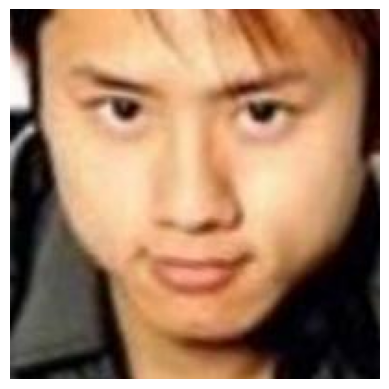

In [8]:
# Exploratory Data Analysis
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img)

<Axes: xlabel='age', ylabel='Density'>

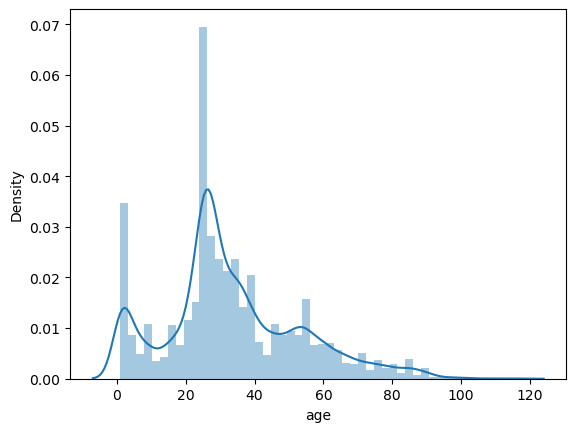

In [9]:
sns.distplot(df['age'])

<Axes: xlabel='gender', ylabel='count'>

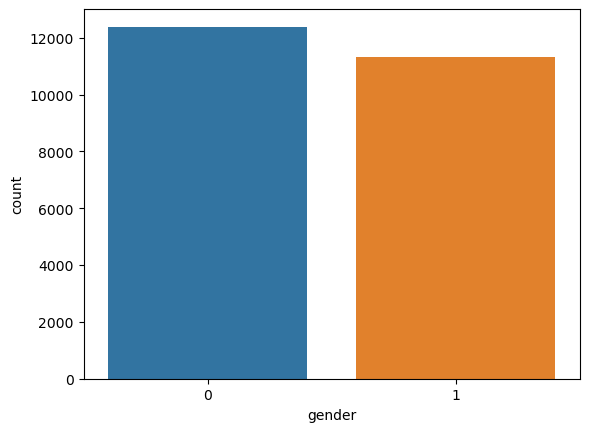

In [10]:
sns.countplot(x=df['gender'])

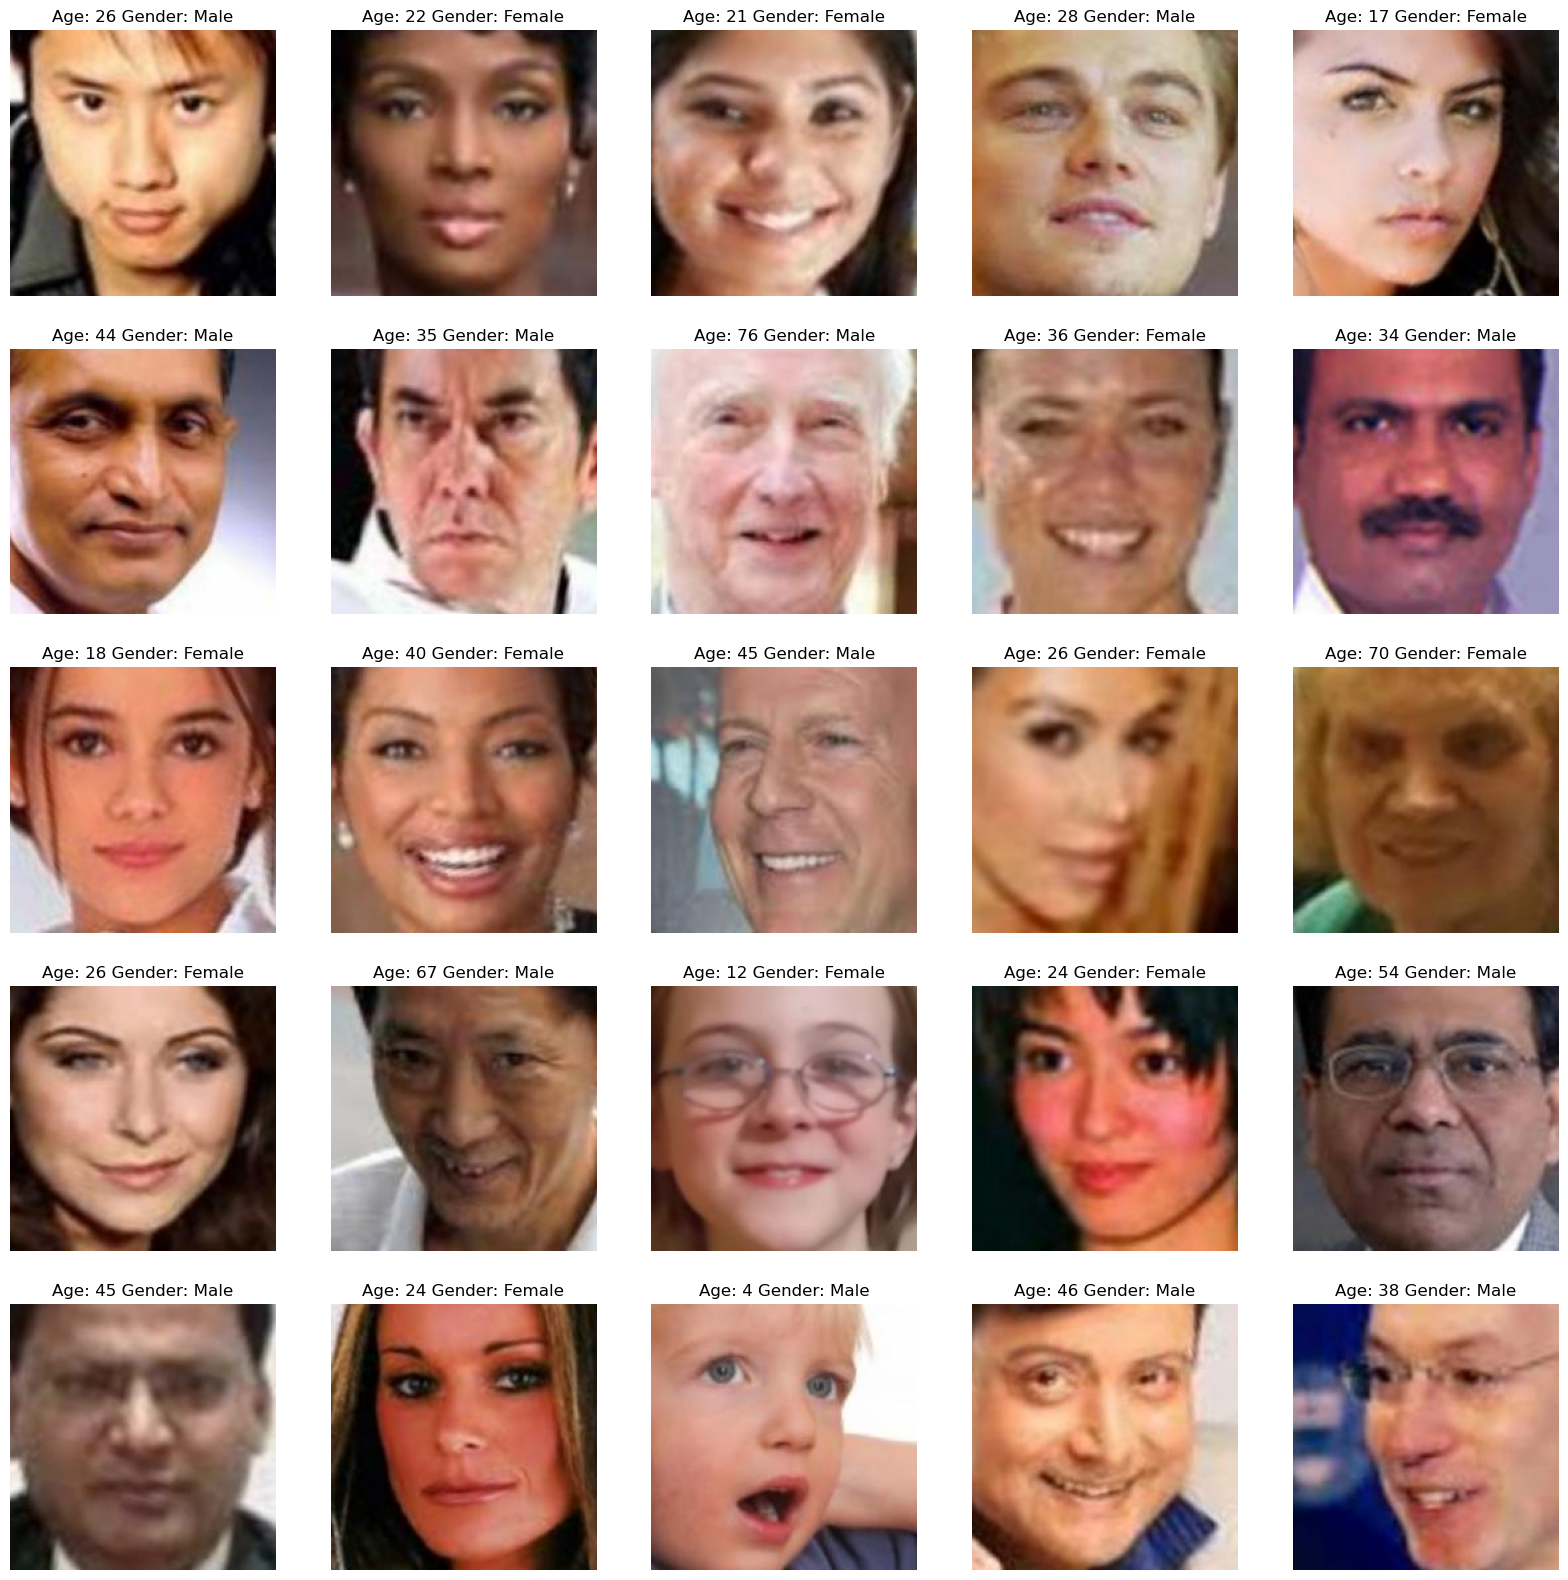

In [11]:
# to display grid of images
plt.figure(figsize=(20,20))
files = df.iloc[0:25]
for index, file, age, gender in files.itertuples():
    plt.subplot(5,5,index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis("off")
    

In [12]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128,128),Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    # Ignore the step if using RGB
    features = features.reshape(len(features),128,128,1)
    return features
    

In [13]:
X = extract_features(df['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [14]:
X.shape

(23708, 128, 128, 1)

In [15]:
X = X/255.0 
# Normalizing the images

In [16]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [17]:
input_shape = (128,128,1)


In [20]:
# Model Creation
inputs = Input((input_shape))
conv_1 = Conv2D(32, kernel_size=(3,3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2,2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3,3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2,2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3,3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2,2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3,3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2,2)) (conv_4)

flatten = Flatten() (maxp_4)
#fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy','mae'], optimizer='adam', metrics=['accuracy'])


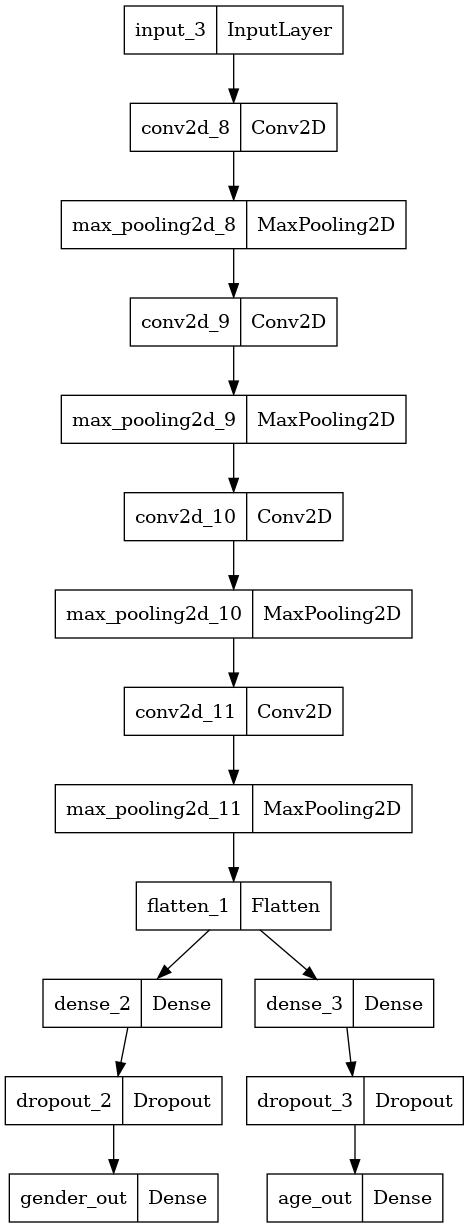

In [22]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [23]:
# train the model
history = model.fit(x=X,y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 [==============================] - 30s 22ms/step - loss: 15.9606 - gender_out_loss: 0.6834 - age_out_loss: 15.2771 - gender_out_accuracy: 0.5451 - age_out_accuracy: 0.0477 - val_loss: 12.6817 - val_gender_out_loss: 0.5647 - val_age_out_loss: 12.1170 - val_gender_out_accuracy: 0.7128 - val_age_out_accuracy: 0.0456
Epoch 2/30
593/593 [==============================] - 11s 19ms/step - loss: 12.0194 - gender_out_loss: 0.5180 - age_out_loss: 11.5014 - gender_out_accuracy: 0.7443 - age_out_accuracy: 0.0366 - val_loss: 10.5191 - val_gender_out_loss: 0.4666 - val_age_out_loss: 10.0525 - val_gender_out_accuracy: 0.7706 - val_age_out_accuracy: 0.0245
Epoch 3/30
593/593 [==============================] - 11s 19ms/step - loss: 10.2106 - gender_out_loss: 0.4471 - age_out_loss: 9.7634 - gender_out_accuracy: 0.7870 - age_out_accuracy: 0.0205 - val_loss: 9.0433 - val_gender_out_loss: 0.4020 - val_age_out_loss: 8.6413 - val_gender_out_accuracy: 0.8108 - val_age_out_accuracy: 0.0137
E

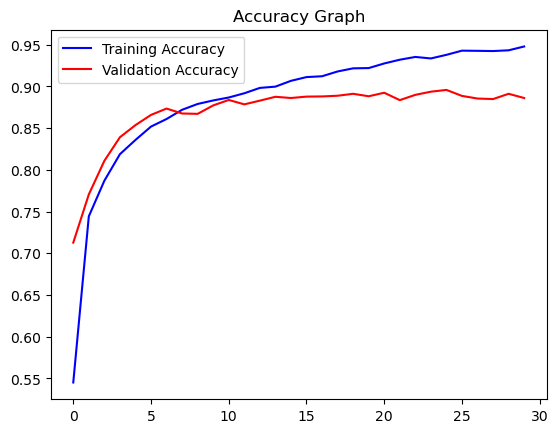

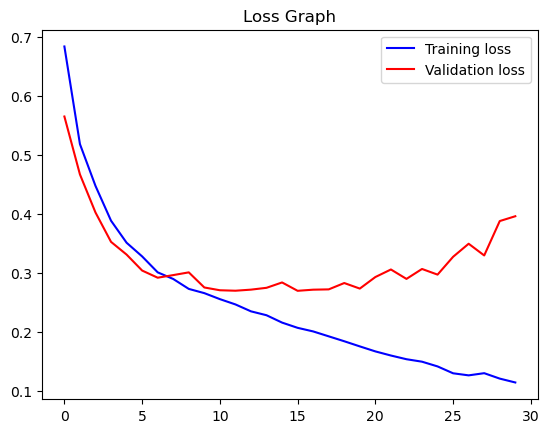

In [28]:
# plot the results
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']


plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

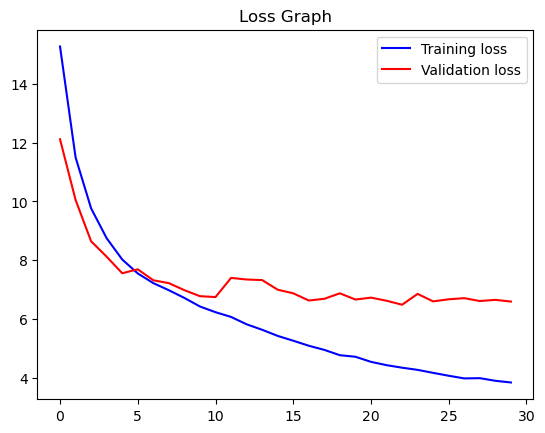

In [30]:
# plot results for age
loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

Original Gender: Female Original Age: 3
1/1 [==============================] - 0s 29ms/step
predicted Gender: Female Predicted Age: 2


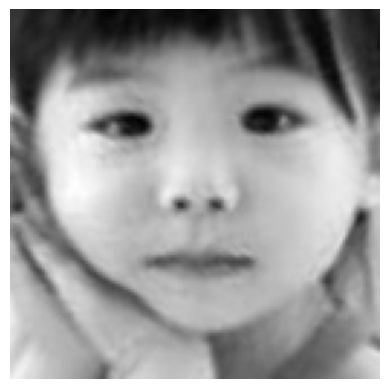

In [35]:
# prediction with test data
image_index = 100
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
pred = model.predict(X[image_index].reshape(1,128,128,1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap="gray")

Original Gender: Female Original Age: 26
1/1 [==============================] - 0s 20ms/step
predicted Gender: Female Predicted Age: 27


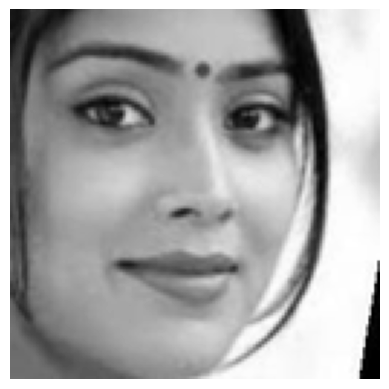

In [39]:
image_index = 5000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
pred = model.predict(X[image_index].reshape(1,128,128,1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap="gray")